# Imports

In [29]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import euclidean, cdist

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

# Load the data

In [30]:
india = pd.read_csv("../Data/India.csv", skiprows=2)
india['Month'] = pd.to_datetime(india['Month'], infer_datetime_format=True)
india = india.set_index(['Month'])
india.sort_index(inplace=True)
print(india.dtypes)
india.head()

what is vaping: (India)    int64
is vaping safe: (India)    int64
vaping shop: (India)       int64
vaping device: (India)     int64
dtype: object


,what is vaping: (India),is vaping safe: (India),vaping shop: (India),vaping device: (India)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [31]:
uk = pd.read_csv("../Data/UK.csv", skiprows=2)
uk['Month'] = pd.to_datetime(uk['Month'], infer_datetime_format=True)
uk = uk.set_index(['Month'])
uk.sort_index(inplace=True)
print(uk.dtypes)
uk.head()

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


,what is vaping: (United Kingdom),is vaping safe: (United Kingdom),vaping shop: (United Kingdom),vaping device: (United Kingdom)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [32]:
usa = pd.read_csv("../Data/USA.csv", skiprows=2)
usa['Month'] = pd.to_datetime(usa['Month'], infer_datetime_format=True)
usa = usa.set_index(['Month'])
usa.sort_index(inplace=True)
print(usa.dtypes)
usa.head()

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


,what is vaping: (United States),is vaping safe: (United States),vaping shop: (United States),vaping device: (United States)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [33]:
canada = pd.read_csv("../Data/Canada.csv", skiprows=2)
canada['Month'] = pd.to_datetime(canada['Month'], infer_datetime_format=True)
canada = canada.set_index(['Month'])
canada.sort_index(inplace=True)
print(canada.dtypes)
canada.head()

what is vaping: (Canada)    int64
is vaping safe: (Canada)    int64
vaping shop: (Canada)       int64
vaping device: (Canada)     int64
dtype: object


,what is vaping: (Canada),is vaping safe: (Canada),vaping shop: (Canada),vaping device: (Canada)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


# Preprocess

In [6]:
#usa.replace({'<1': 0}, inplace=True)
#usa['vaping device: (United States)'] = usa['vaping device: (United States)'].astype('int64')

# Visualize

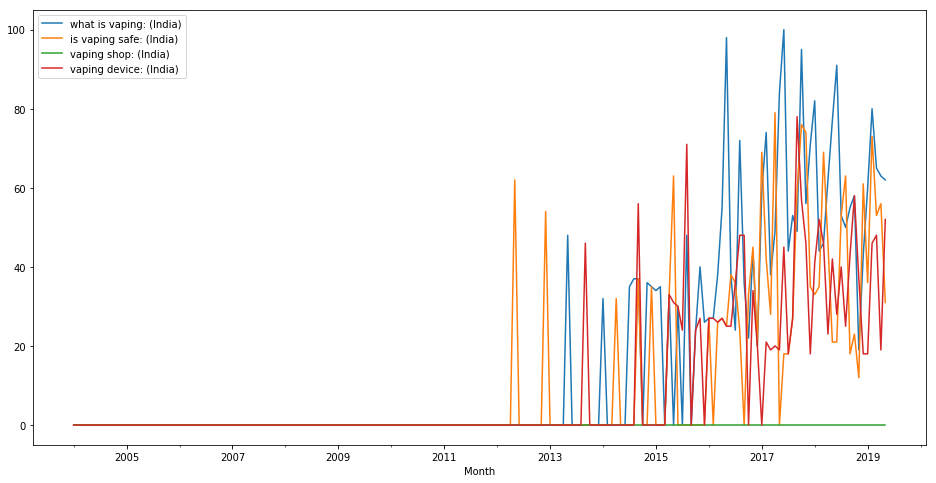

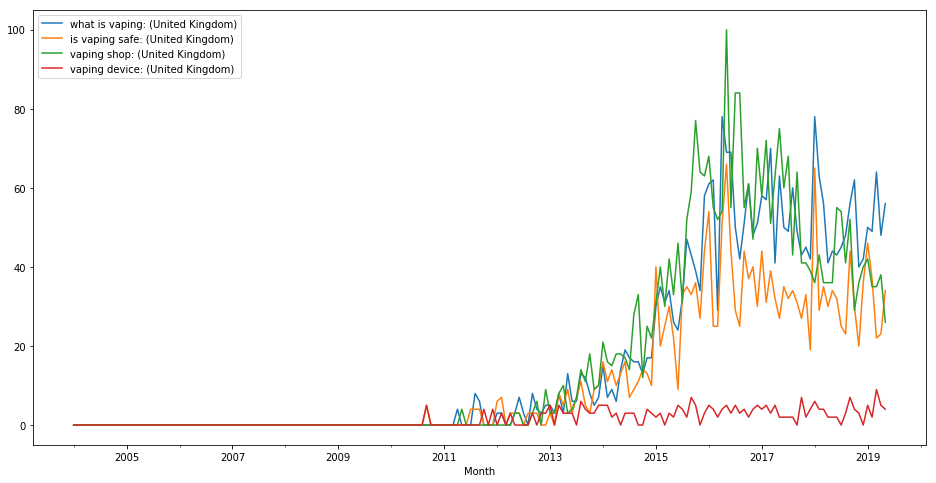

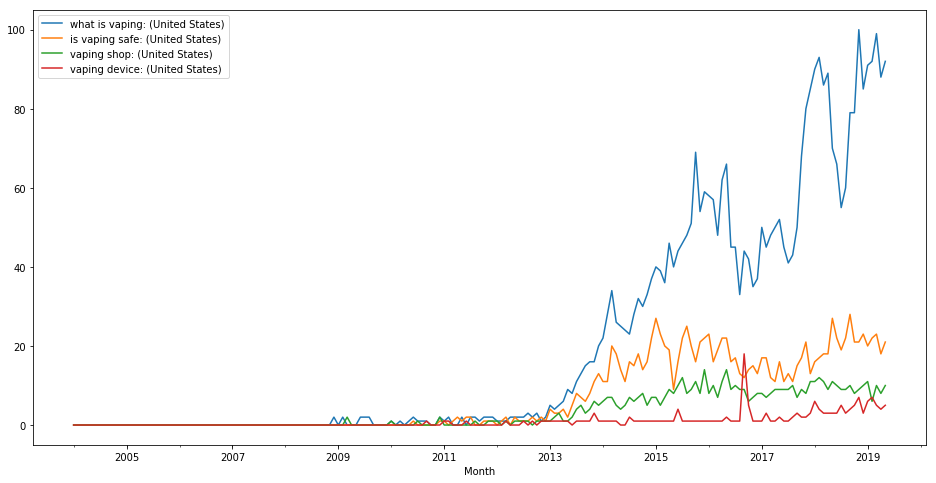

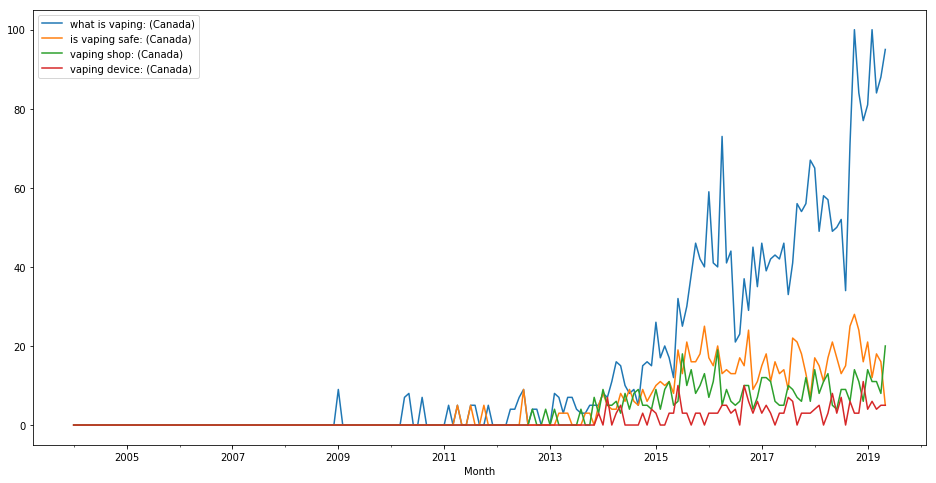

In [34]:
plt.rcParams['figure.figsize'] = (16,8)
india.plot()
uk.plot()
usa.plot()
canada.plot()
plt.legend()
plt.rcParams['figure.figsize'] = (6,4)

# Similarity models

## DTW

In [8]:
# https://nipunbatra.github.io/blog/2014/dtw.html

## GAK

In [9]:
# https://web.sfc.wide.ad.jp/~kurosagi/public-posts/2017-04-11-global-alignment-kernels.html

## FastDTW

In [10]:
# https://pypi.org/project/fastdtw/

In [35]:
from fastdtw import fastdtw

### Full Data

In [36]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

In [37]:
distance, path = fastdtw(india_mat, uk_mat, dist=euclidean)
print("Distance between India and UK:", distance)

distance, path = fastdtw(india_mat, usa_mat, dist=euclidean)
print("Distance between India and USA:", distance)

distance, path = fastdtw(uk_mat, usa_mat, dist=euclidean)
print("Distance between UK and USA:", distance)

distance, path = fastdtw(canada_mat, uk_mat, dist=euclidean)
print("Distance between Canada and UK:", distance)

distance, path = fastdtw(canada_mat, usa_mat, dist=euclidean)
print("Distance between Canada and USA:", distance)

distance, path = fastdtw(canada_mat, india_mat, dist=euclidean)
print("Distance between Canada and India:", distance)

Distance between India and UK: 4440.293650520247
Distance between India and USA: 3267.6540237666536
Distance between UK and USA: 3258.465992421458
Distance between Canada and UK: 3096.9753307544916
Distance between Canada and USA: 1075.5389167790452
Distance between Canada and India: 3135.133553649693


### Last 1 year

In [38]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

In [39]:
distance, path = fastdtw(india_mat, uk_mat, dist=euclidean)
print("Distance between India and UK:", distance)

distance, path = fastdtw(india_mat, usa_mat, dist=euclidean)
print("Distance between India and USA:", distance)

distance, path = fastdtw(uk_mat, usa_mat, dist=euclidean)
print("Distance between UK and USA:", distance)

distance, path = fastdtw(canada_mat, uk_mat, dist=euclidean)
print("Distance between Canada and UK:", distance)

distance, path = fastdtw(canada_mat, usa_mat, dist=euclidean)
print("Distance between Canada and USA:", distance)

distance, path = fastdtw(canada_mat, india_mat, dist=euclidean)
print("Distance between Canada and India:", distance)

Distance between India and UK: 754.5982254599579
Distance between India and USA: 665.0378885412194
Distance between UK and USA: 568.3827569148002
Distance between Canada and UK: 529.7351818575606
Distance between Canada and USA: 236.62090636128548
Distance between Canada and India: 658.4468887546922


## TSLearn

In [15]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.metrics.html

In [40]:
from tslearn.metrics import dtw_path

### Full Data

In [41]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

In [42]:
path, distance = dtw_path(india_mat, uk_mat)
print("Distance between India and UK:", distance)

path, distance = dtw_path(india_mat, usa_mat)
print("Distance between India and USA:", distance)

path, distance = dtw_path(uk_mat, usa_mat)
print("Distance between UK and USA:", distance)

path, distance = dtw_path(canada_mat, uk_mat)
print("Distance between Canada and UK:", distance)

path, distance = dtw_path(canada_mat, usa_mat)
print("Distance between Canada and USA:", distance)

path, distance = dtw_path(canada_mat, india_mat)
print("Distance between Canada and India:", distance)

Distance between India and UK: 530.5761019872645
Distance between India and USA: 385.9391143690932
Distance between UK and USA: 389.1567807452415
Distance between Canada and UK: 373.160823238453
Distance between Canada and USA: 100.03499387714281
Distance between Canada and India: 373.82750032601933


### Last 1 year

In [43]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

In [44]:
path, distance = dtw_path(india_mat, uk_mat)
print("Distance between India and UK:", distance)

path, distance = dtw_path(india_mat, usa_mat)
print("Distance between India and USA:", distance)

path, distance = dtw_path(uk_mat, usa_mat)
print("Distance between UK and USA:", distance)

path, distance = dtw_path(canada_mat, uk_mat)
print("Distance between Canada and UK:", distance)

path, distance = dtw_path(canada_mat, usa_mat)
print("Distance between Canada and USA:", distance)

path, distance = dtw_path(canada_mat, india_mat)
print("Distance between Canada and India:", distance)

Distance between India and UK: 219.28064210048274
Distance between India and USA: 199.2435695323691
Distance between UK and USA: 167.84516674602222
Distance between Canada and UK: 155.68558057829247
Distance between Canada and USA: 64.10148204214939
Distance between Canada and India: 194.83326204732086


# Averaging models

In [21]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.barycenters.html
# https://blog.acolyer.org/2016/05/13/dynamic-time-warping-averaging-of-time-series-allows-faster-and-more-accurate-classification/

# Clustering models

## TimeSeriesKMeans

In [22]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.clustering.html

In [45]:
from tslearn.clustering import TimeSeriesKMeans

### Full Data

In [46]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

all_mat = np.array([india_mat, uk_mat, usa_mat, canada_mat])
all_mat

array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [65, 53,  0, 48],
        [63, 56,  0, 19],
        [62, 31,  0, 52]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [64, 22, 35,  9],
        [48, 23, 38,  5],
        [56, 34, 26,  4]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [99, 23, 10,  5],
        [88, 18,  8,  4],
        [92, 21, 10,  5]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [84, 18, 11,  4],
        [88, 16,  8,  5],
        [95,  5, 20,  5]]], dtype=int64)

In [52]:
km = TimeSeriesKMeans(n_clusters=3, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(3, 185, 4)
[0 2 1 1]


In [53]:
km = TimeSeriesKMeans(n_clusters=2, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 185, 4)
[0 1 1 1]


### Last 1 year

In [54]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

all_mat = np.array([india_mat, uk_mat, usa_mat, canada_mat])
all_mat

array([[[ 82,  33,   0,  41],
        [ 44,  35,   0,  52],
        [ 46,  69,   0,  46],
        [ 62,  46,   0,  23],
        [ 77,  21,   0,  42],
        [ 91,  21,   0,  28],
        [ 53,  53,   0,  40],
        [ 50,  63,   0,  25],
        [ 55,  18,   0,  43],
        [ 58,  23,   0,  58],
        [ 19,  12,   0,  37],
        [ 43,  61,   0,  18]],

       [[ 78,  65,  36,   6],
        [ 63,  29,  43,   4],
        [ 56,  35,  36,   4],
        [ 41,  30,  36,   2],
        [ 44,  34,  36,   2],
        [ 43,  32,  55,   2],
        [ 45,  25,  54,   0],
        [ 48,  23,  41,   3],
        [ 56,  44,  52,   7],
        [ 62,  30,  29,   4],
        [ 40,  20,  36,   3],
        [ 42,  36,  40,   0]],

       [[ 90,  16,  11,   6],
        [ 93,  17,  12,   4],
        [ 86,  18,  11,   3],
        [ 89,  18,   9,   3],
        [ 70,  27,  11,   3],
        [ 66,  22,  10,   3],
        [ 55,  19,   9,   5],
        [ 60,  22,   9,   3],
        [ 79,  28,  10,   4],
      

In [55]:
km = TimeSeriesKMeans(n_clusters=3, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(3, 12, 4)
[0 2 1 1]


In [56]:
km = TimeSeriesKMeans(n_clusters=2, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 12, 4)
[0 1 1 1]


# Classification models

## DTW + 1-NN

In [32]:
# https://stats.stackexchange.com/questions/323571/how-to-classify-m-multivariate-time-series-into-k-known-categories
# https://github.com/alexminnaar/time-series-classification-and-clustering

## KNeighborsTimeSeriesClassifier

In [33]:
# https://tslearn.readthedocs.io/en/latest/auto_examples/plot_neighbors.html
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.neighbors.html
# https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping

In [57]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

### Full Data

In [67]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

In [68]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
clf.fit([india_mat, uk_mat, usa_mat], y=[0, 1, 1])
clf.predict(canada_mat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

### Last 1 year

In [69]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

In [70]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
clf.fit([india_mat, uk_mat, usa_mat], y=[0, 1, 1])
clf.predict(canada_mat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## LSTM

In [39]:
# https://www.analyticsvidhya.com/blog/2019/01/introduction-time-series-classification/

## SFA

In [40]:
# https://github.com/patrickzib/SFA